# Amplitude-based kNN

In [1]:
import qiskit;
# qiskit.__qiskit_version__

In [2]:
from qiskit import IBMQ;

In [3]:
import numpy as np
from qiskit import (
#     QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer)
from qiskit.visualization import plot_histogram

In [4]:
# Il controlled Ry sembra non essere ancora nei gate inclusi normalmente
import qiskit.aqua.circuits.gates.controlled_ry_gates

# Initial state preparation

Qubits are |a>|d>|c>|m>

In [5]:
q = QuantumRegister(4, 'q')
c = ClassicalRegister(2, 'c')
circuit = qiskit.circuit.quantumcircuit.QuantumCircuit(q,c)

In [6]:
# from qiskit.aqua.utils.circuit_utils import is_qubit
# is_qubit(q[0])

In [7]:
# Sommiamo su m
circuit.h(3)
# Poniamo il quibit ancilla in superposizione di stati
circuit.h(0)

In [8]:
# from qiskit.circuit.quantumcircuit import QuantumCircuit

In [9]:
# Immettiamo il vettore di input
circuit.cry(np.pi*0.90,q[0],q[1])
circuit.x(0)

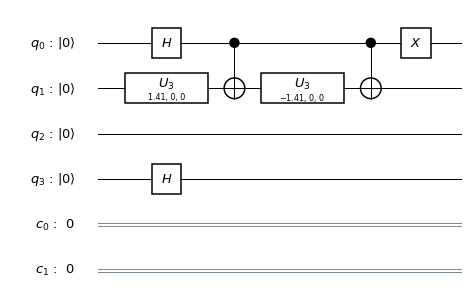

In [10]:
circuit.draw(output='mpl')

Entanglement of the first training vector |ψ_t0> with the |1> state of the ancilla and the |0> state of the m qubit

The second training vector |ψ_t1> should be entangled with the |1> states of the ancilla and the m qubit

|ψ_t0> = |0> is already at its desired place

In [11]:
circuit.ccx(q[0],q[3],q[1])

It remains to flip the class qubit for the second training vector

In [12]:
circuit.cx(q[1],q[2])

In [13]:
circuit.measure(q[0],c[0])
circuit.measure(q[2],c[1])

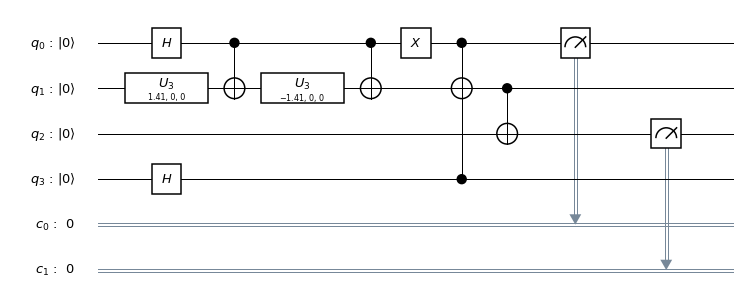

In [14]:
circuit.draw(output='mpl')

In [15]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'01': 241, '00': 14, '10': 496, '11': 249}


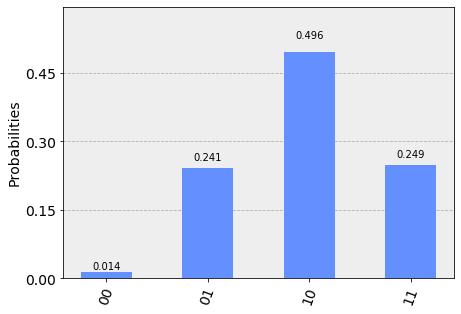

In [16]:
plot_histogram(counts)

In [17]:
goodCounts = {k: counts[k] for k in counts.keys() & {'00', '01'}}
goodCounts

{'01': 241, '00': 14}

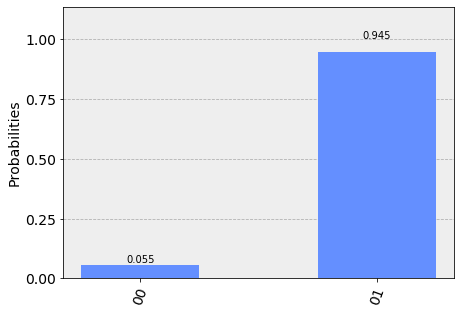

In [18]:
plot_histogram(goodCounts)